


# k-Nearest Neighbours



## Objectives

- Learn to apply the k-Nearest Neighbours (k-NN)
- Implement a k-NN algorithm to find the nearest neighbour.
- Use Scikit-Learn in-built library to perform k-NN search.
- Use k-NN for imputation.
- Use k-NN for classification.




## Introduction
The k-Nearest Neighbour (k-NN) is a widely used algorithm that can be applied to many different problems. We can use k-NN for classification or imputing missing values in our dataset. The idea behind the algorithm is intuitive and one that we uses instinctively - we simply assume things that are similar to each other works in a similar manner.

We will see how we can apply the k-NN algorithm to a set of data for imputing missing values and classification.

We will first write the codes from scratch to have a better understanding of the algorithm and subsequently use Scikit-Learn for efficiency and easy of use.

## k-NN Using Python and Numpy

We will now implement k-NN using Python with the help of Numpy. The implementation is to ensure that you have good grasp of the concept behind k-NN. In this implementation, we will use Euclidean distance as a measurement of the similarity among data points. To find the nearest neighbour of a data point, we will calculate the distances to all other data points and choose the one that is nearest (with the shortest distance).

In [2]:
#The variable data is a numpy array holding a 2-dimensional dataset
import numpy as np
data = np.array([
    [0, 10],
    [1, 9],
    [2, 2],
    [3, 5],
    [4, 15],
    [5, 9],
    [7, 1],
    [8, 8],
    [9, 4]
    ])

#We are looking for the nearest neighbour of the search point [5, 2]
searchpoint = np.array([[6,2]])

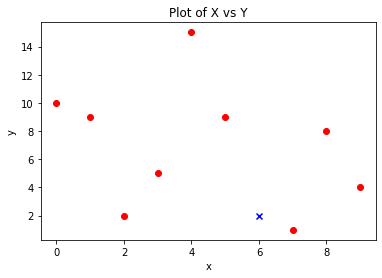

In [5]:
#Visualize the data by generating a scatter plot
import matplotlib.pyplot as plot

#Create a figure
plot.figure()
plot.title("Plot of X vs Y")
plot.xlabel("x")
plot.ylabel("y")
plot.scatter(data[:,0], data[:,1], c="red")

plot.scatter(searchpoint[:, 0], searchpoint[:, 1], c="blue", marker="x")
plot.show()

The red dots are our data points and the blue “x” symbol is our search point. By visual inspection, we know that [7,1] should be our nearest neighbour.

Let us get the machine to do the searching for us using a k-NN algorithm.
___

In [6]:
#Calculates distances from all points to the search point
#note that axis = 1 means sum by rows
distances = np.sqrt(np.sum((data - searchpoint)**2, axis=1)) 

#The function argmin calculates the index of the array element with the 
#smallest value and in this case, the shortest distance
index_nearest_neighbour = np.argmin(distances)

#Print out the nearest neighbour, you should get [7, 1]
print("Nearest Neighbour={}".format(data[index_nearest_neighbour, :]))
#Print out the distance
print("Distance={}".format(distances[index_nearest_neighbour]))

Nearest Neighbour=[7 1]
Distance=1.4142135623730951


## k-NN with Scikit-Learn

Usually we do not have to implement algorithms ourselves, we can use open source libraries with more efficient and proven implementations. Let us now see how we can use scikit-learn to perform k-NN.

In [ ]:
#Use Scikit-learn's k-NN alogrithm

import numpy as np
from sklearn.neighbors import NearestNeighbors as knn

data = np.array([
    [0, 10],
    [1, 9],
    [2, 2],
    [3, 5],
    [4, 15],
    [5, 9],
    [7, 1],
    [8, 8],
    [9, 4]
    ])

searchpoint = np.array([[6,2]])

#As in standard scikit-learn operations, we first call the fit function
#with our data. The number 1 means we are only looking for 1 neighbour. Also
#See the next section for explanation on the algorithm=”brute” parameter
model = knn(n_neighbors=1, algorithm="brute").fit(data)
#Call the kneighbors function to begin the search for the nearest neighbour 
distance, indices = model.kneighbors(searchpoint)
#The function will return the index of the nearest neighbour as well as the
#distance between the two points
print(distance)
print(data[indices])


### Algorithm=Brute vs kd_tree vs ball_tree

The algorithm parameter indicates how we want the k-NN algorithm to search for the nearest neighbour. If we specify  ```brute```, it uses brute force method by calculating the distance between the search point and all the data points as we have done previously in our own implementation. However, this method is inefficient and is computational intensive with large number of data points and features. In such cases, we should switch to either ```kd_tree``` or ```ball_tree```. 

We can also indicate ```auto``` for the algorithm parameter. In this case, we leave it to Scikit-Learn to figure out which is the best method to use. Note that if the algorithm parameter is not specified, it is defaulted to using ```auto```.
Refer to http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms for a detailed discussion of the algorithms and their merits.

## k-NN Imputation

A common use of k-NN is for imputing missing values in a data set. The idea is that when there is a missing value in a data sample, we can replace the missing values with one from a similar sample. We find the nearest neighbour and use the value from the nearest neighbout as a substitutional value.

Let us see how that works. 

Make sure that you have downloaded the _SmokersMissingValues.csv file_. Save the file in the same directory as your jupyter notebook file.


In [9]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors as knn

df = pd.get_dummies(pd.read_csv("C:/Users/malco/Desktop/OTHER DATA/npp/SmokersMissingValues.csv", index_col="Year"))
print(df.head())

      16 and Over  16-24  25-34  35-49  50-59  60 and Over  Method_Unweighted  \
Year                                                                            
1974           51     47     55     55   53.0         44.0                  1   
1976           46     43     48     50   50.0         40.0                  1   
1978           44     40     48     48   48.0         38.0                  1   
1980           42     38     47     45   47.0         36.0                  1   
1982           38     36     40     40   42.0         33.0                  1   

      Method_Weighted  
Year                   
1974                0  
1976                0  
1978                0  
1980                0  
1982                0  


We will now use k-NN imputer offered by Scikit-Learn to automatically find the nearest neighbour and use the values from the neighbour as substitution.

*Note that k-NN imputer in Scikit-Learn is a recent addition, it is only available from version 0.22 and above]*


In [10]:
from sklearn.impute import KNNImputer

#Create a new Imputer with k=1
#We will only use the nearest neighbour
imputer = KNNImputer(n_neighbors=1)
#The fit_transform will return a numpy array
#with all values filled in, we replace our dataframe values with that 
#from the imputer
df[:] = imputer.fit_transform(df)
#print out and take a look at the result
df.loc[[1988, 2007]]


,16 and Over,16-24,25-34,35-49,50-59,60 and Over,Method_Unweighted,Method_Weighted
Year,,,,,,,,
1988,33.0,33.0,37.0,37.0,32.0,29.0,1.0,0.0
2007,22.0,27.0,29.0,25.0,20.0,13.0,0.0,1.0



Note that results from using k-NN and interpolation may not get the same results as they used different algorithms.


In [14]:
# Trying out interpolation using the nearest method.
df = pd.get_dummies(pd.read_csv("C:/Users/malco/Desktop/OTHER DATA/npp/SmokersMissingValues.csv", index_col="Year"))
df = df.interpolate(method="nearest")
df.loc[[1988, 2007]]

,16 and Over,16-24,25-34,35-49,50-59,60 and Over,Method_Unweighted,Method_Weighted
Year,,,,,,,,
1988,33,33,37,37,32.0,29.0,1,0
2007,22,27,29,25,23.0,13.0,0,1


Note:

1. Before version 0.22, sckit-learn perform missing values imputation using mean, median or most frequent values but it does not support k-NN imputation. The k-NN imputation above only works for version 0.22 onwards, if you get an error, make sure to update your scikit-learn package.
2. Alterative implementation are also available as add-on https://github.com/scikit-learn/scikit-learn/issues/2989 and fancyimpute (https://pypi.org/project/fancyimpute/) instead.
3. Pandas also support operations to impute missing values, but it also does not support k-NN. It does support fill-forward, fill-backward and interpolation which are very useful for data that has certain trends. Alternatively, you can also replace missing values with fixed or mean values.

## k-NN Classifier

k-NN can also be used to implement a classifier. Since Scikit-Learn already provided us with a k-NN classifier, our job is much easier.
We will use a simple data set ```churn_classifier.csv``` file to illustrate the use of the k-NN classifier. 

## Step 9

Download the file ```churn_classifier.csv``` and place it in the same directory as your notebook file.

## Step 10

Place the following codes in a new cell. The comments provide the explanation of how the classifier is trained and used for prediction.

In [17]:
import sklearn.datasets as datasets
import pandas as pd

#We need to import the k-NN Classifier from skleart.neighbors
from sklearn.neighbors import KNeighborsClassifier
#Read in the CSV file, set the Id column as the index
df = pd.read_csv("C:/Users/malco/Desktop/OTHER DATA/npp/churn_classifier.csv", index_col="Id")
#Print out the first 10 rows for visual inspection
print(df.head(5))

#Set the CHURNED column as our label (target value to be predicted)
YTrain = df["CHURNED"]
#Remove the CHURNED column from our input variables
XTrain = df.drop("CHURNED", axis=1)
#Create a k-NN Classifier
classifier = KNeighborsClassifier(n_neighbors=3)
#Train the classifier using our training data
classifier.fit(XTrain, YTrain)

#Let us test, note that our testing data is similar to row with id 0 and 8
#Expected result is 1 (likely) and 0 (unlikely)
XTest = pd.DataFrame([
[5.2, 7.5, 80.1, 0, 53, 0, 1, 1, 23000.00, 1],
[15.0, 4.5, 30.1, 0, 35, 1, 0, 0, 90000.00, 1]
])

#Iterate through each row and do the predicton
for index, row in XTest.iterrows():
    if classifier.predict(row.values.reshape(1, -1))[0] == 0:
        print("Customer not likely to terminate contract")
    else:
        print("Customer likely to terminate contract")   

    LONGDIST  International     LOCAL  DROPPED  AGE  SEX  STATUS  CHILDREN  \
Id                                                                           
0    5.24640        7.51510  86.32780        0   57    0       1         2   
3    0.00000        0.00000   3.94229        0   50    0       0         2   
4    5.55564        0.00000   9.36347        1   68    0       1         2   
8   14.01930        5.68043  29.80650        0   34    1       0         0   
10  13.66400        2.95642  32.63810        0   60    1       1         2   

    Est_Income  Car_Owner  CHURNED  
Id                                  
0      27535.3          1        1  
3      64632.3          0        1  
4      81000.9          0        1  
8      87467.1          1        0  
10     83220.6          0        1  
Customer likely to terminate contract
Customer not likely to terminate contract


# Conclusion

The practical demonstrate the basic concept of the k-NN algorithm. We also illustrated the common application of the algorithm in imputation and classification using the tools provided by Scikit-Learn and Pandas.